In [2]:
from ultralytics import YOLO

import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

c:\Users\rreve\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\rreve\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [33]:
model = YOLO('F:/KULIAH/Semester 8/Project Cloud Computing/runs/detect/train3/weights/best.pt')


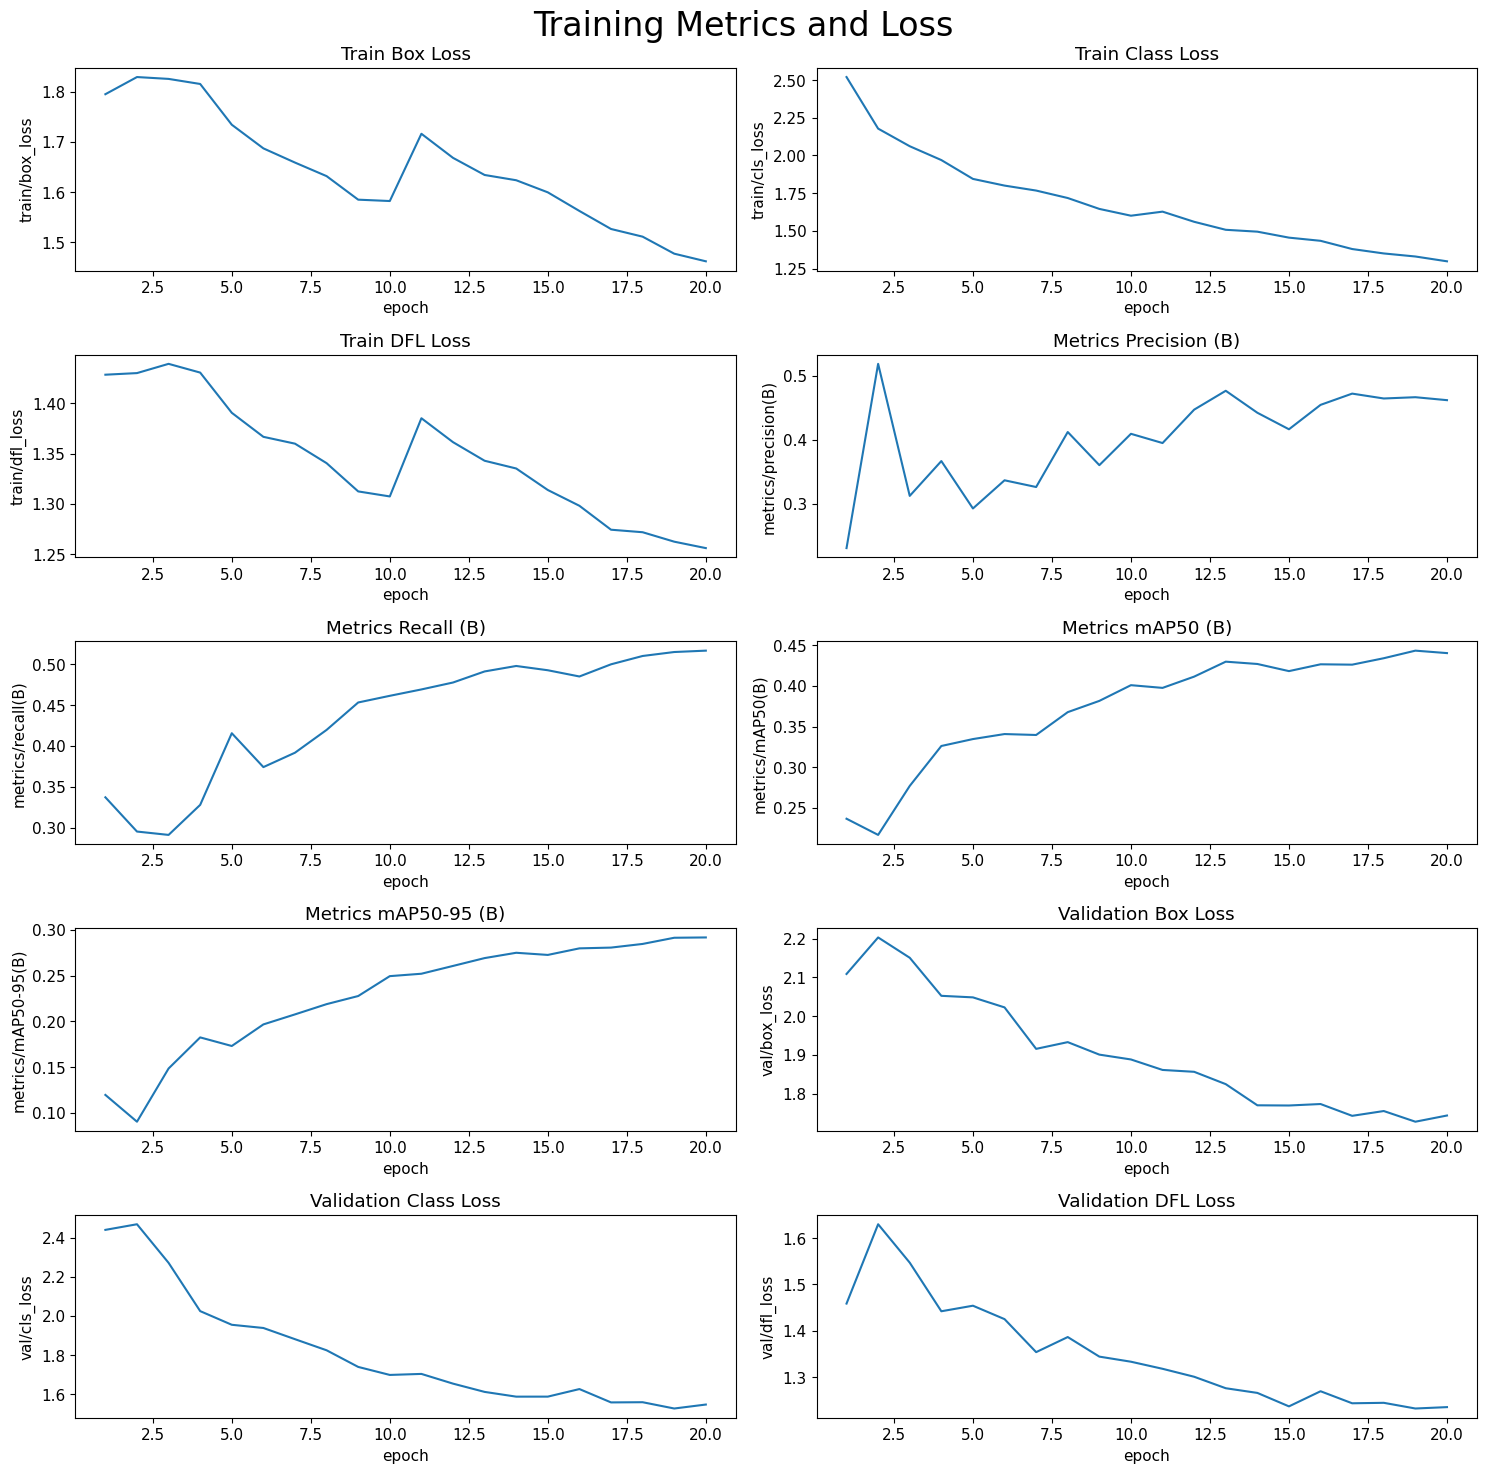

In [35]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('F:/KULIAH/Semester 8/Project Cloud Computing/runs/detect/train3/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [36]:
%matplotlib inline
# Loading the best performing model
model = YOLO('F:/KULIAH/Semester 8/Project Cloud Computing/runs/detect/train3/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.1.33 🚀 Python-3.10.0 torch-2.2.1+cpu CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning F:\KULIAH\Semester 8\Project Cloud Computing\Dataset 3\test\labels.cache... 247 images, 2 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 244, len(boxes) = 617. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:33<00:00,  2.07s/it]


                   all        247        617      0.553      0.436      0.494      0.359
            Brown spot        247        165      0.375     0.0545      0.201      0.133
           Leaf Blight        247         51      0.433       0.51      0.431      0.262
            Leaf Scald        247         36      0.816      0.861      0.911       0.58
            Leaf blast        247        103      0.415      0.165      0.251      0.137
     Narrow Brown spot        247        207      0.412      0.169      0.256      0.156
               Healthy        247         55       0.87      0.855      0.911      0.888
Speed: 0.5ms preprocess, 105.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val3


In [37]:
# Function to perform ship detections
def rice_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 320x320 (no detections), 158.0ms
Speed: 1.0ms preprocess, 158.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Healthy, 138.0ms
Speed: 1.0ms preprocess, 138.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Brown spot, 135.0ms
Speed: 1.0ms preprocess, 135.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Healthy, 137.0ms
Speed: 2.0ms preprocess, 137.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Healthy, 138.0ms
Speed: 2.0ms preprocess, 138.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Healthy, 150.0ms
Speed: 1.0ms preprocess, 150.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Leaf blast, 124.0ms
Speed: 1.0ms preprocess, 124.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Leaf Blight, 129.0ms
Speed: 1.0ms preprocess, 129.0ms inference, 1.0ms 

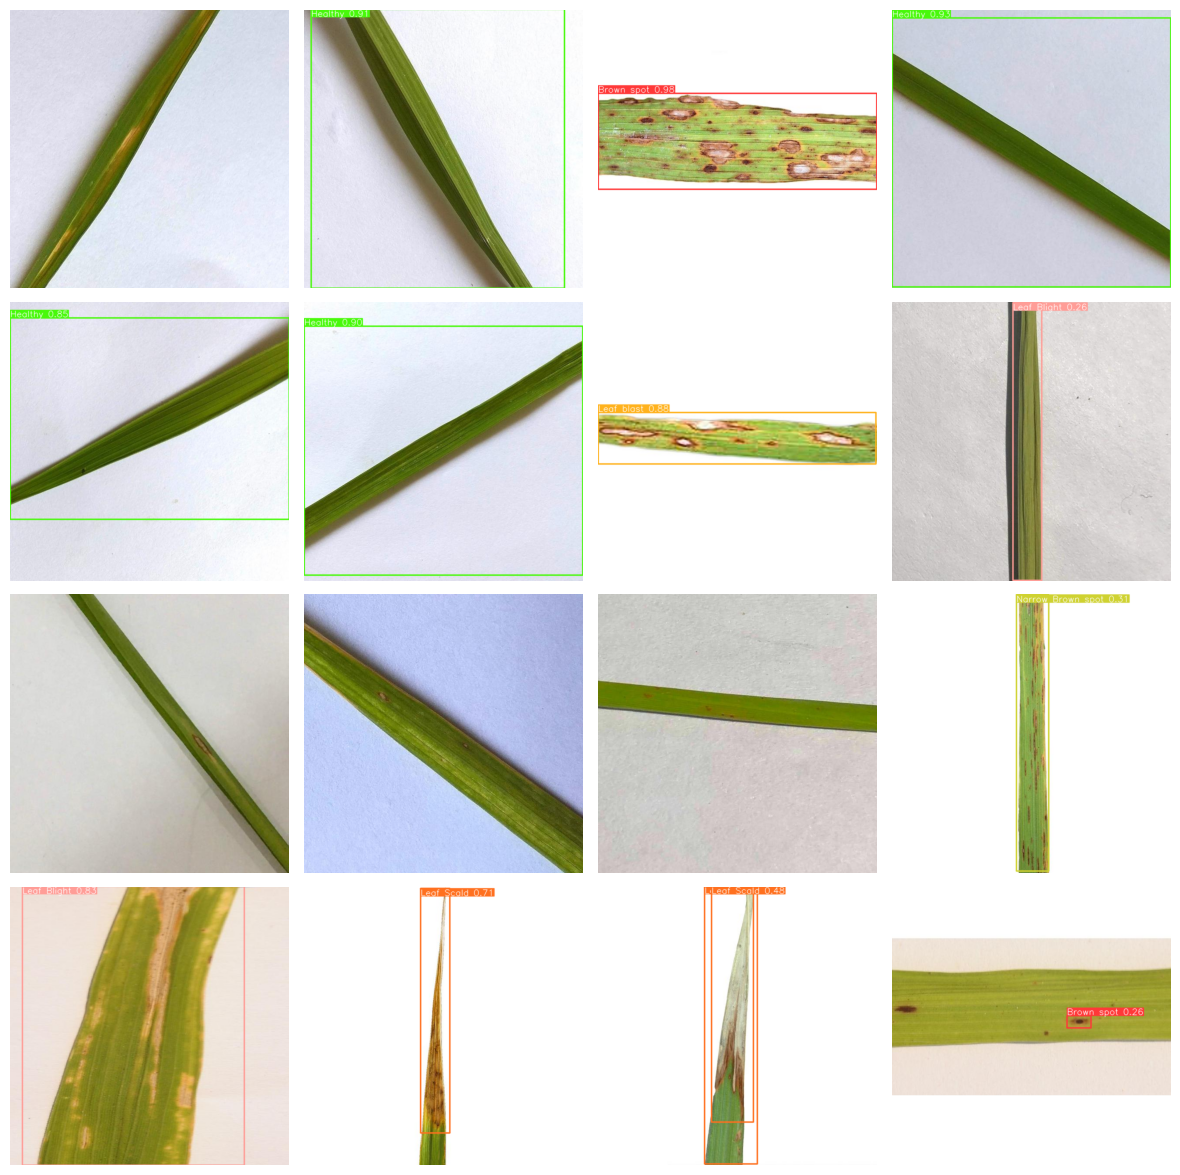

In [38]:
import random

# Define the directory where the custom images are stored
custom_image_dir = 'F:/KULIAH/Semester 8/Project Cloud Computing/Dataset 3/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = rice_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


0: 320x320 1 Leaf Blight, 130.0ms
Speed: 1.0ms preprocess, 130.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Brown spot, 117.0ms
Speed: 1.0ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 96x320 (no detections), 61.0ms
Speed: 2.0ms preprocess, 61.0ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 320)

0: 320x320 (no detections), 114.0ms
Speed: 1.0ms preprocess, 114.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 (no detections), 181.0ms
Speed: 1.0ms preprocess, 181.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 4 Leaf Blights, 1 Leaf blast, 118.0ms
Speed: 3.0ms preprocess, 118.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 (no detections), 115.0ms
Speed: 1.0ms preprocess, 115.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 Leaf blast, 128.0ms
Speed: 1.0ms prep

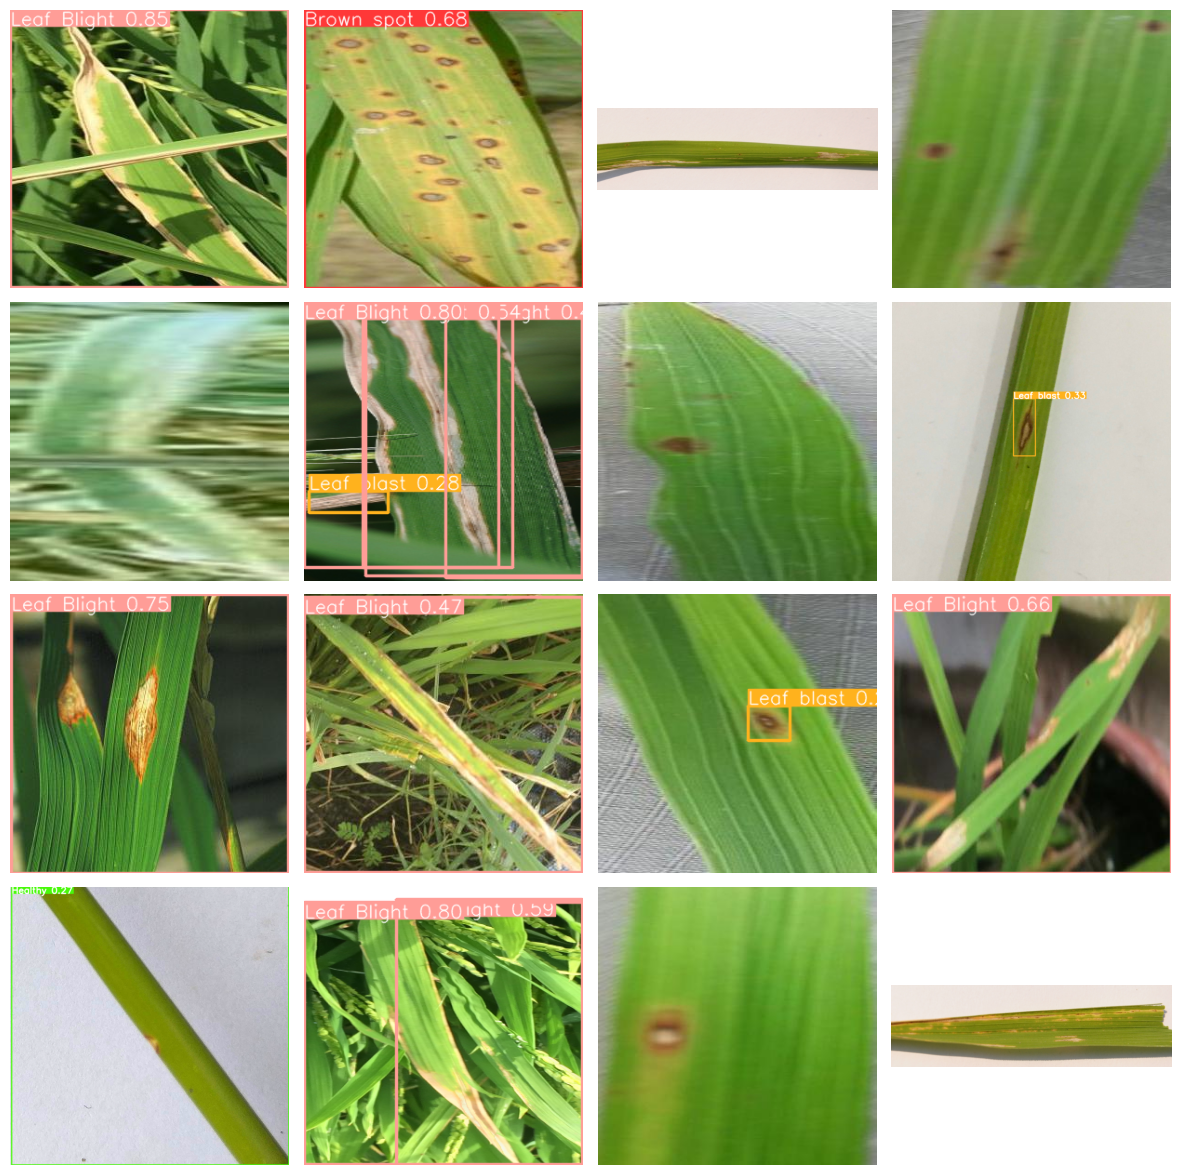

In [40]:
import random

# Define the directory where the custom images are stored
custom_image_dir = 'F:/KULIAH/Semester 8/Project Cloud Computing/Dataset 2/RiceDiseaseDataset_yolo_test/images/test'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = rice_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

0: 320x256 1 Brown spot, 205.0ms
Speed: 4.0ms preprocess, 205.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 256)


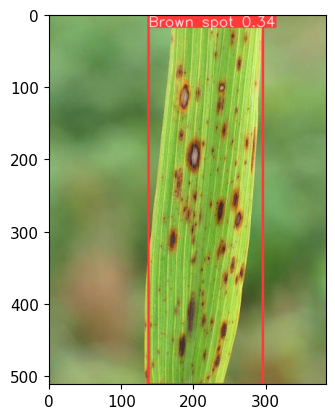

In [68]:
detect_img = rice_detect('F:/KULIAH/Semester 8/Project Cloud Computing/tes/unnamed.jpg')

plt.imshow(detect_img)